In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [3]:
file_path = "member.uid___A001_X2d20_X39ab.Cloverleaf_sci.spw29.cube.I.pbcor.fits-Z-profile-Region_6-Statistic_Mean-Coordinate_Current-2025-07-07-17-02-22.tsv"

df = pd.read_csv(file_path, sep="\t", skiprows=5)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]

df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce')
df = df.dropna()

x = df[df.columns[0]]
y = df[df.columns[1]] * 1000  # Jy → mJy

In [4]:
my_lines =[(109.179, "H3O+ v2=0, 1")]

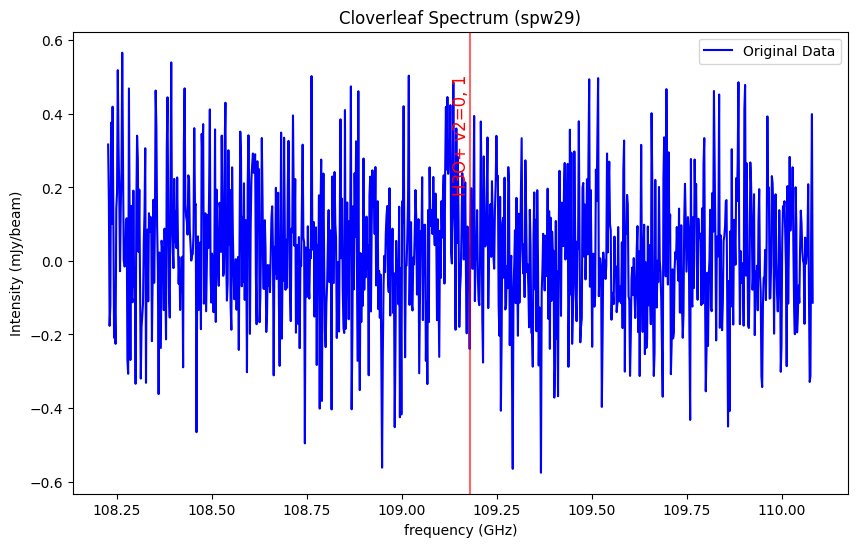

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Original Data", color="blue")
plt.xlabel("frequency (GHz)")
plt.ylabel("Intensity (mJy/beam)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y)*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')
plt.title("Cloverleaf Spectrum (spw29)")
plt.grid(False)
plt.legend()
plt.show()

### binning + boxcar

In [6]:
def boxcar_smooth(y, kernel_size):
    kernel = np.ones(kernel_size)/kernel_size
    return np.convolve(y, kernel, mode="same")

def rebin_spectrum(x, y, bin_size):
    x = np.array(x)
    y = np.array(y)
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned


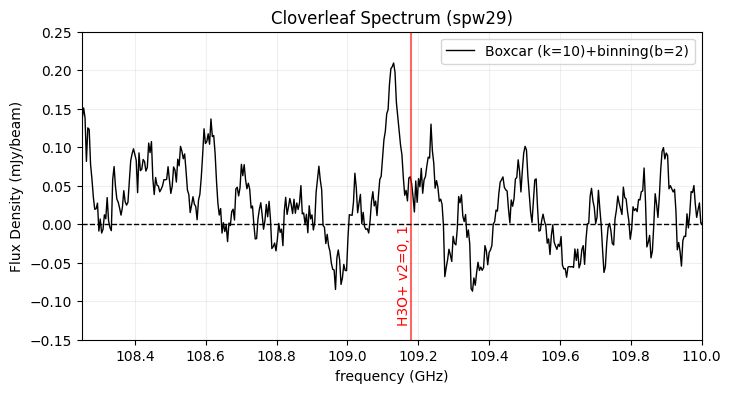

In [ ]:
x_binned, y_binned = rebin_spectrum(x, y, bin_size=2)

y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=10)


plt.figure(figsize=(8, 4))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=1, label="binning(b=2)+Boxcar (k=10)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_binned_boxcar)*0.0, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw29)")
plt.xlim(108.25, 110)
plt.ylim(-0.15, 0.25)
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()